In [7]:
# import necessary libararies

# for data analysis
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
#from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost


# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore")


In [11]:
# load dataset- from seaborn

df= pd.read_csv(r"C:\Users\User\Downloads\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# for better understanding and flow of analysis, I will rename some columns

df.columns= ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate",
            "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia", "target"]
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# data verification- for data type, number of features and rows, missing data, etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

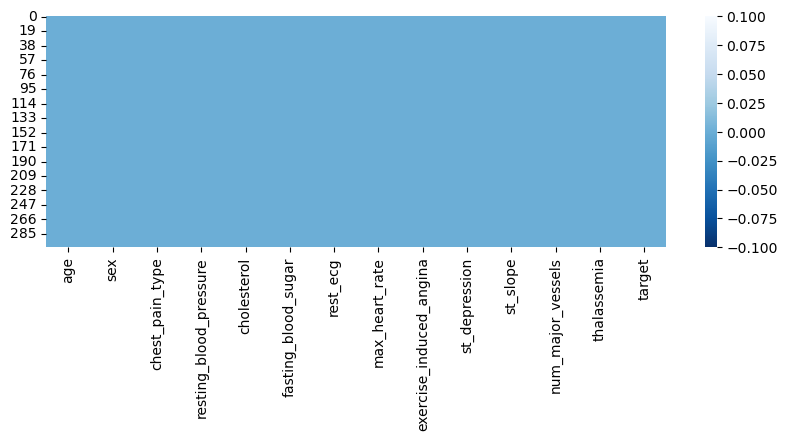

In [19]:
# check for missing values

print(df.isnull().sum())

# visualizing the missing data
plt.figure(figsize= (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap= "Blues_r")

In [21]:
# statistical analysis of the data

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

### Univariate Analysis

In [27]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

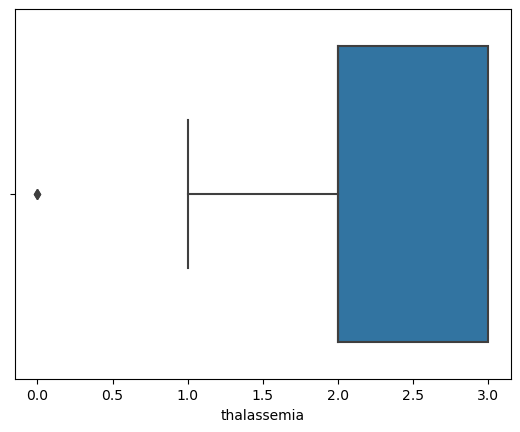

In [29]:
# check for outliers

sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

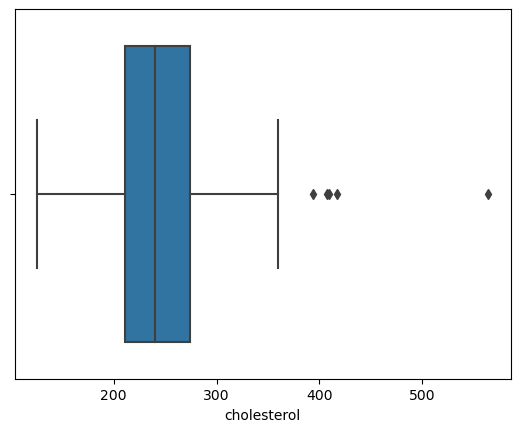

In [31]:
sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='max_heart_rate'>

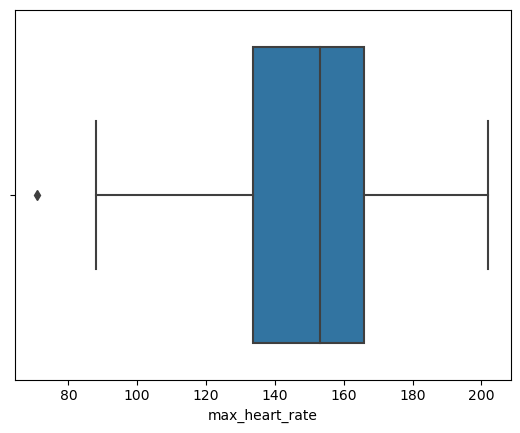

In [12]:
sns.boxplot(x=df["max_heart_rate"])

Text(0.5, 1.0, 'Total Number of Patients')

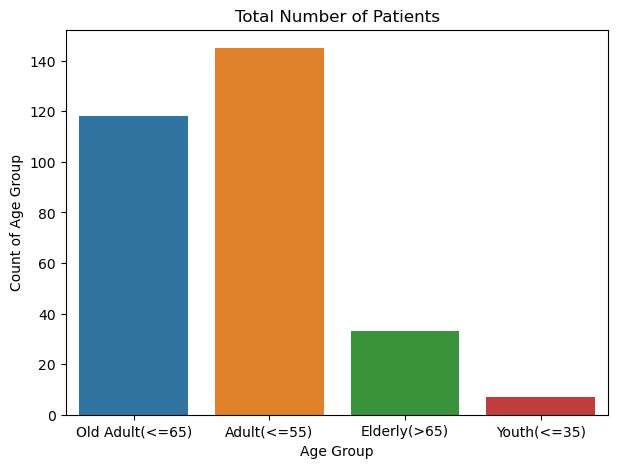

In [37]:
# Data Visualization
# age bracket

def age_bracket(age):
    if age <=35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df["age_bracket"]= df["age"].apply(age_bracket)

# investigating the age group of patients
plt.figure(figsize=(7,5))
sns.countplot(x= "age_bracket", data= df)
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients")

From the diagram above, adults are the highest number of patients, followed by old adults and the elderly. Youths are the least number of patients with from the dataset

Text(0.5, 1.0, 'Total Number of Patients')

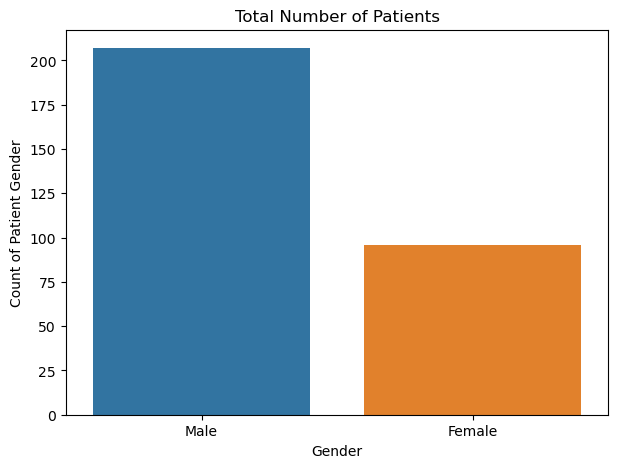

In [39]:
# sex

def gender(sex):
    if sex==1:
        return "Male"
    else:
        return "Female"
 
df["gender"]= df["sex"].apply(gender)
    
# investigating the age group of patients
plt.figure(figsize=(7,5))
sns.countplot(x= "gender", data= df)
plt.xlabel("Gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")    

The diagram above shows there are more males than females in the dataset

Text(0.5, 1.0, 'Total Number of Patients')

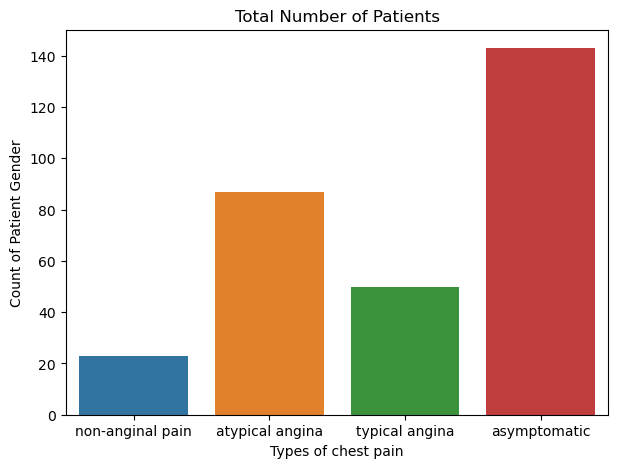

In [41]:
# chest pain type- (1)typcal angina (2)atypical angina (3)non-anginal pain (4)asymptomatic

def chest_pain(cp):
    if cp==1:
        return "typical angina"
    elif cp==2:
        return "atypical angina"
    elif cp==3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
 
df["cp_cat"]= df["chest_pain_type"].apply(chest_pain)
                                         
# investigating the age group of patients
plt.figure(figsize=(7,5))
sns.countplot(x= "cp_cat", data= df)
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")  



The diagram above shows asymptomatic as the most prevalent chest pain type from the data

label
Yes    165
No     138
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

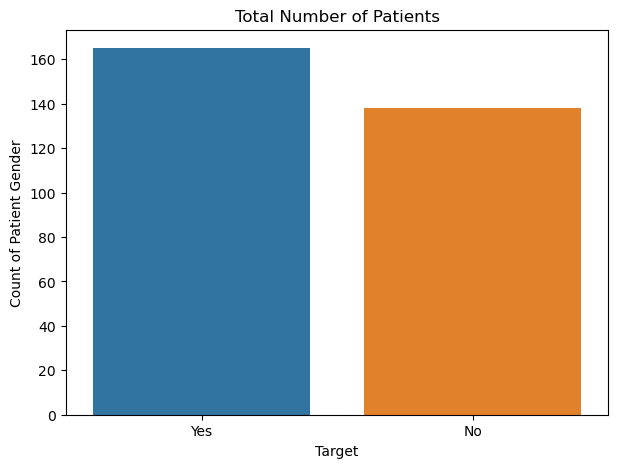

In [43]:
# target- have disease or not (1=yes, 0=no)

def label(tg):
    if tg==1:
        return "Yes"
   
    else:
        return "No"
 
df["label"]= df["target"].apply(label)

# total patient in each category
print(df["label"].value_counts())
                                         
# investigating the target of patients
plt.figure(figsize=(7,5))
sns.countplot(x= "label", data= df)
plt.xlabel("Target")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")  


### Bivariate Analysis

In [45]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

Text(0.5, 1.0, 'Total number of patients')

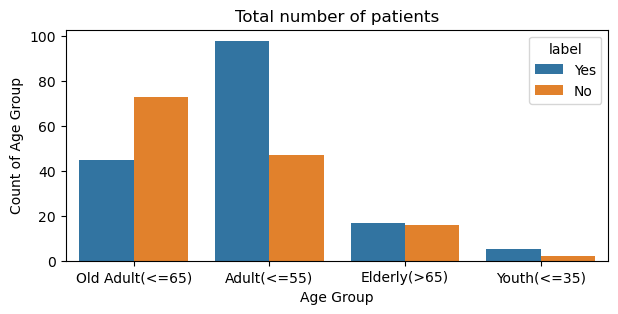

In [47]:
# investigating the age group of patients  by the target feature

plt.figure(figsize=(7,3))
sns.countplot(x="age_bracket", data= df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total number of patients")

The diagram shows heart disease is most prevalent in Adults (<=55)

Text(0.5, 1.0, 'Total number of patients')

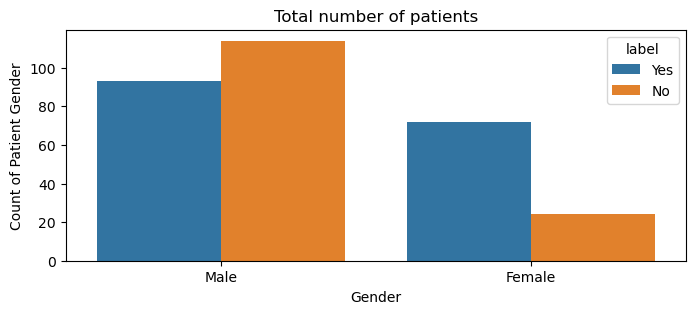

In [49]:
# investigating the gender of patients by the target feature

plt.figure(figsize=(8,3))
sns.countplot(x="gender", data= df, hue="label")
plt.xlabel("Gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total number of patients")

The diagram shows more males have heart disease than the females

Text(0.5, 1.0, 'Total number of patients')

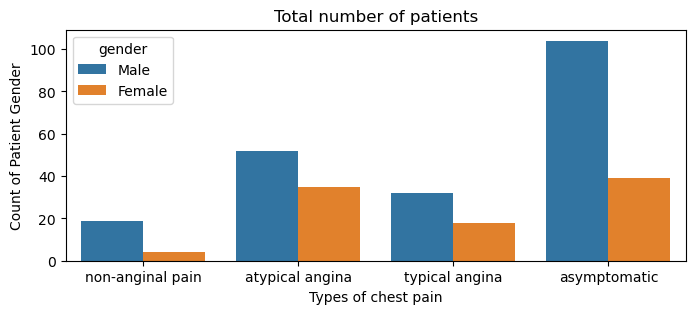

In [53]:
# investigating the chest pain type of patients  by the target feature

plt.figure(figsize=(8,3))
sns.countplot(x="cp_cat", data= df, hue="gender")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Patient Gender")
plt.title("Total number of patients")

The diagram shows that the various chest pain types are much more common in males than females

In [ ]:
# investigating the chest pain type of patients  by gender

plt.figure(figsize=(8,3))
sns.countplot(x="cp_cat", data= df, hue="label")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Patient Gender")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Distribution of Chest Pain Types among different Age groups')

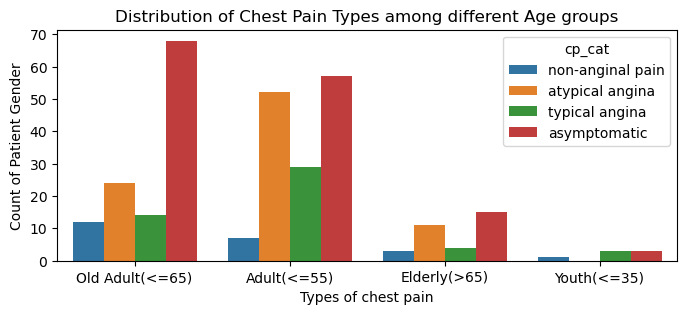

In [65]:
# investigating the chest pain type of patients  by age bracket

plt.figure(figsize=(8,3))
sns.countplot(x="age_bracket", data= df, hue="cp_cat")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Patient Gender")
plt.title("Distribution of Chest Pain Types among different Age groups")

The diagram shows that the youth and the elderly are less troubled by the various chest pain types

### Multivariate Analysis

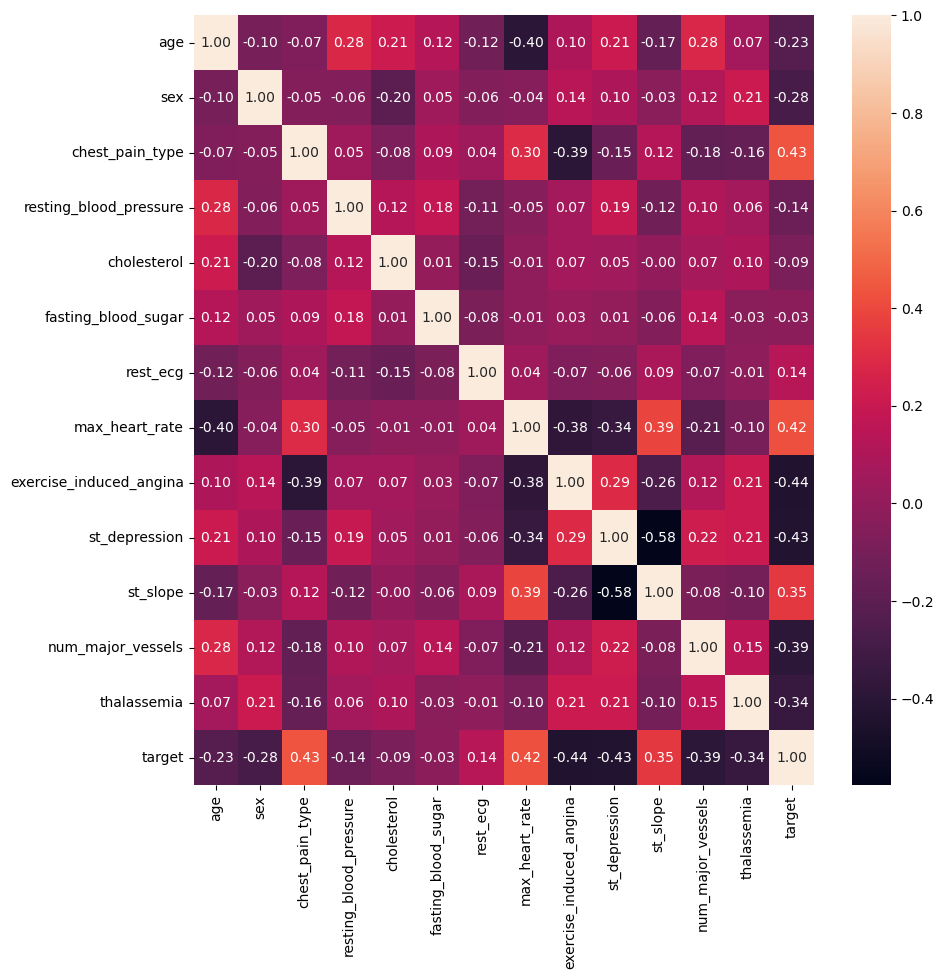

In [85]:
# Correlation between chest pain type and other variables in the dataset

# Method 1
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Create heatmap for correlation matrix
plt.figure(figsize=(10, 10))
hm = sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()


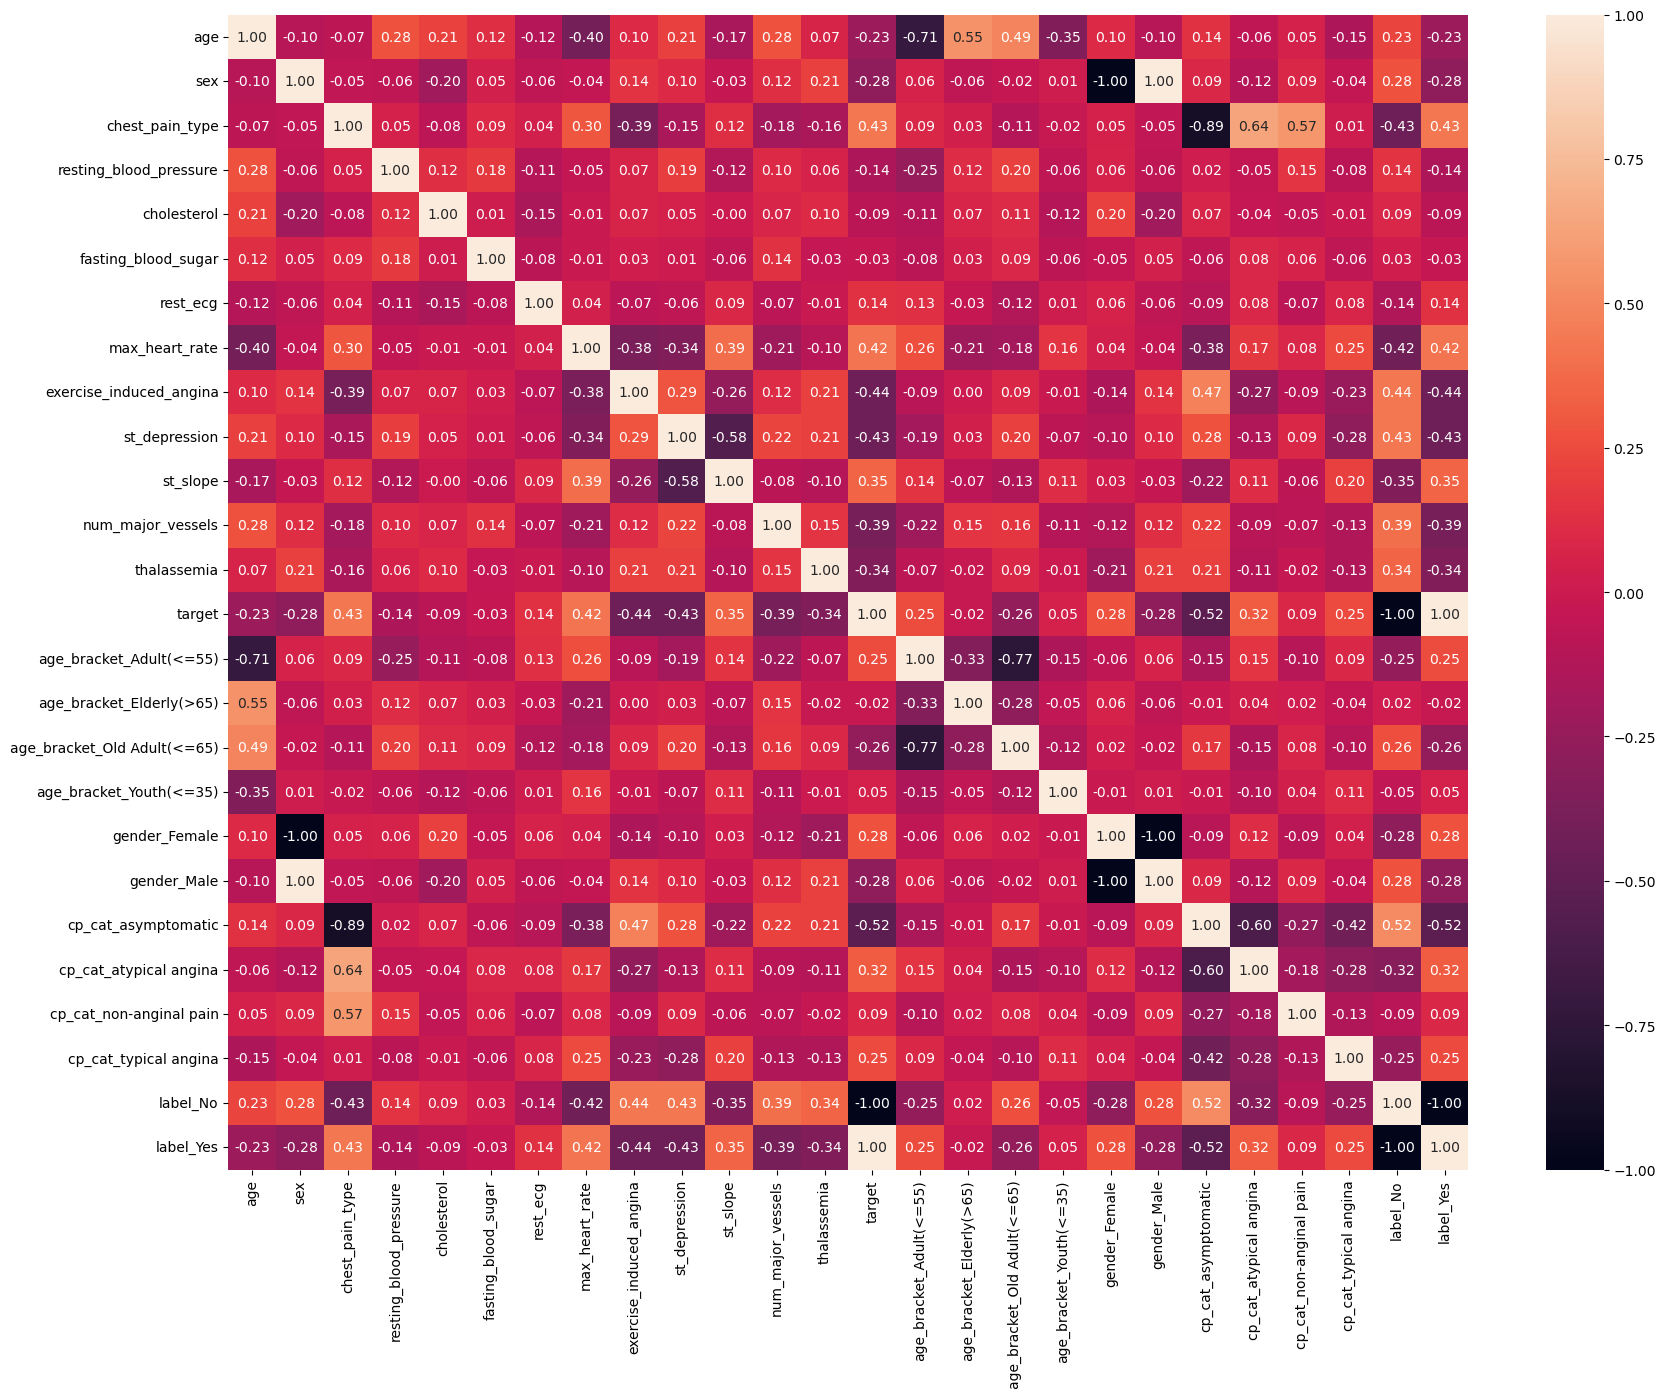

In [87]:
# Method 2

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df)

# Create heatmap for correlation matrix
plt.figure(figsize=(20, 15))
hm = sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()


### Feature Engineering/ Data pre-Processing

In [89]:
# Create a copy of the data (exclude target/label alongside other columns that were created)

df1= df[["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate",
            "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia"]]

label=df[["target"]]

In [91]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [93]:
# Dealing with outliers- 'resting_blood_pressure', 'cholesterol', 'thalassemia'

#Normalize the data (in order to set the columns with outliers between 0 and 1)
scaler= MinMaxScaler()

df1["scaled_RBP"]= scaler.fit_transform(df1["resting_blood_pressure"].values.reshape(-1, 1))
df1["scaled_chol"]= scaler.fit_transform(df1["cholesterol"].values.reshape(-1, 1))
df1["scaled_thal"]= scaler.fit_transform(df1["thalassemia"].values.reshape(-1, 1))
df1["scaled_max_heart_rate"]= scaler.fit_transform(df1["max_heart_rate"].values.reshape(-1, 1))

df1.drop(["resting_blood_pressure", "thalassemia", "cholesterol", "max_heart_rate"], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [97]:
# Split the data set into training and testing sets-(x= questions, y= answers)

X_train, X_test, y_train,y_test= train_test_split(df1, label, test_size=0.2, random_state=42)

In [99]:
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [101]:
y_train.head(3)

,target
132,1
202,0
196,0


In [103]:
# Model building

# Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred= logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))




Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


Accuracy (0.85): The model correctly predicted the target class for approximately 85.25% of the test samples. Accuracy measures the overall
effectiveness of the model, taking both true positives and true negatives into account.

Precision (0.87): Precision of 87.1% indicates that when the model predicts a positive class, it is correct 87.1% of the time. Precision focuses on
minimizing false positives.

Recall (0.84): The recall value of 84.38% shows that the model is able to correctly identify 84.38% of all the actual positive cases. Recall is useful
when it’s important to minimize false negatives.

F1-Score (0.86): The F1-score, which combines precision and recall, is 85.71%. It provides a balanced measure of the model's accuracy in handling both
false positives and false negatives.

AUC-ROC (0.85): The Area Under the ROC Curve (AUC-ROC) is 0.85, meaning the model has an 85% chance of distinguishing between the positive and negative 
classes. A higher AUC score indicates better model performance.

Overall, this Logistic Regression model performs well, with strong accuracy, precision, recall, and AUC-ROC values, making it effective at
distinguishing between the classes.









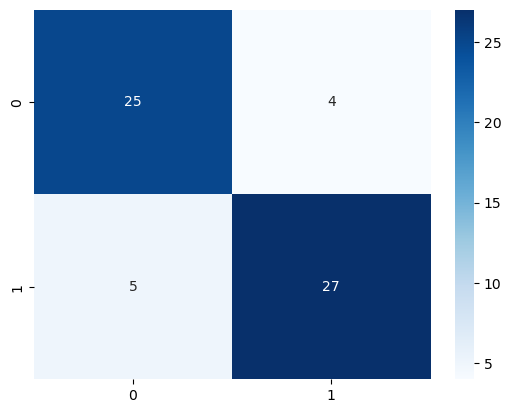

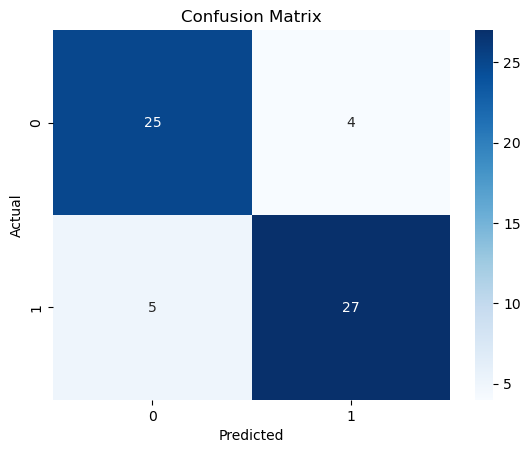

In [106]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.show()

lcm= confusion_matrix(y_test, ly_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt= 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

25 True Negatives (TN): The model correctly identified 25 negative cases.

27 True Positives (TP): The model correctly identified 27 positive cases.

4 False Positives (FP): The model incorrectly predicted 4 cases as positive.

5 False Negatives (FN): The model missed 5 positive cases, predicting them as negative.

To explain the above better, the confusion matrix shows that, of all the people that do not have a heart disease, 25 were accurately predicted to not have a heart disease (TN), while 5 were incorrectly predicted to have heart disease (FN).
Of all the people that have a heart disease, 27 were accurately predicted to have a heart disease (TP), and 4 incorrectly predicted to have a heart disease(FP).

In [113]:
# Model Building
#Random Forest Classifier

rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred= rfc.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test,rfy_pred))
print("Prcesion:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1_score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.8524590163934426
Prcesion: 0.8484848484848485
Recall: 0.875
F1_score: 0.8615384615384615
AUC-ROC: 0.8512931034482758


Accuracy (0.85): The model correctly predicted the target class for approximately 85.24% of the test samples. Accuracy measures the overall effectiveness of the model, taking both true positives and true negatives into account.

Precision (0.84): Precision of 87.1% indicates that when the model predicts a positive class, it is correct 84.8% of the time (approximately 85%). Precision focuses on minimizing false positives.

Recall (0.87): The recall value of 84.38% shows that the model is able to correctly identify 87.50% of all the actual positive cases. Recall is useful when it’s important to minimize false negatives.

F1-Score (0.86): The F1-score, which combines precision and recall, is 86.1%. It provides a balanced measure of the model's accuracy in handling both false positives and false negatives.

AUC-ROC (0.85): The Area Under the ROC Curve (AUC-ROC) is 0.85, meaning the model has an 85% chance of distinguishing between the positive and negative classes. A higher AUC score indicates better model performance.

Overall, this Random Forest classifier model performs well (only slightly lower results compared to the Logistic Regression), with strong accuracy, precision, recall, and AUC-ROC values, making it effective at distinguishing between the classes.

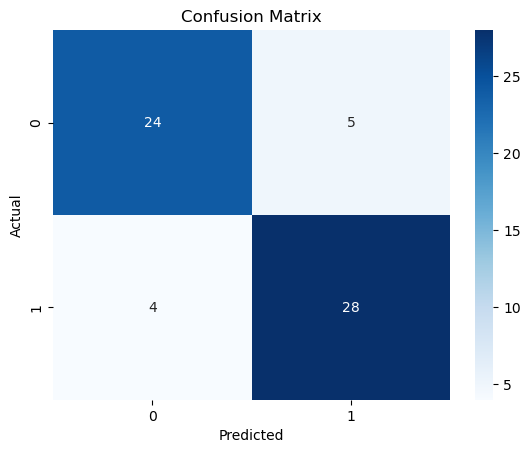

In [118]:
# Create a confusion matrix
rcm= confusion_matrix(y_test, rfy_pred)

#visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()            
            

The confusion matrix above shows that, of all the people that do not have a heart disease, 24 were accurately predicted to not have a heart disease (TN), while 4 were incorrectly predicted to have heart disease (FN). Of all the people that have a heart disease, 28 were accurately predicted to have a heart disease (TP), and 5 incorrectly predicted to have a heart disease(FP).

In [123]:
# Machine Learning Algorithms will be applied to the dataset

# Import necessary classifiers
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Machine Learning Algorithms
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']]



In [125]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeC

In [129]:
acc_list= {}
precision_list= {}
recall_list= {}
roc_list= {}

for classifier in classifiers:
    model= classifier [0]
    model.fit(X_train, y_train)
    model_name= classifier[1]

    pred= model.predict(X_test)

    a_score= accuracy_score(y_test, pred)
    p_score= precision_score(y_test, pred)
    r_score= recall_score(y_test, pred)
    roc_score= roc_auc_score(y_test, pred)

    acc_list[model_name]= ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name]= ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name]= ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name]= ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')
    


In [131]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['83.61%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifier': ['73.77%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision Tree': ['85.25%'],
 'Logistic Regression': ['85.25%']}

In [137]:
print ('Accuracy score')
s1= pd.DataFrame(acc_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,75.41%,73.77%,65.57%,86.89%,85.25%,85.25%


In [139]:
print ('Precision score')
s2= pd.DataFrame(precision_list)
s2.head()

Precision score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,84.38%,79.31%,67.39%,65.71%,90.0%,92.59%,87.1%


In [141]:
print ('Recall score')
s3= pd.DataFrame(recall_list)
s3.head()

Recall score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,84.38%,71.88%,96.88%,71.88%,84.38%,78.12%,84.38%


In [143]:
print ('ROC score')
s4= pd.DataFrame(roc_list)
s4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,83.57%,75.59%,72.58%,65.25%,87.02%,85.61%,85.29%


In [151]:
precision_list

{'XGB Classifier': ['86.21%'],
 'Random Forest': ['84.38%'],
 'K-Nearest Neighbors': ['79.31%'],
 'SGD Classifier': ['67.39%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision Tree': ['92.59%'],
 'Logistic Regression': ['87.1%']}

In [153]:
recall_list


{'XGB Classifier': ['78.12%'],
 'Random Forest': ['84.38%'],
 'K-Nearest Neighbors': ['71.88%'],
 'SGD Classifier': ['96.88%'],
 'SVC': ['71.88%'],
 'Naive Bayes': ['84.38%'],
 'Decision Tree': ['78.12%'],
 'Logistic Regression': ['84.38%']}

In [155]:
roc_list

{'XGB Classifier': ['82.17%'],
 'Random Forest': ['83.57%'],
 'K-Nearest Neighbors': ['75.59%'],
 'SGD Classifier': ['72.58%'],
 'SVC': ['65.25%'],
 'Naive Bayes': ['87.02%'],
 'Decision Tree': ['85.61%'],
 'Logistic Regression': ['85.29%']}

The results provide a comprehensive evaluation of multiple machine learning classifiers based on four key metrics: **accuracy**, **precision**, **recall**, and **AUC-ROC**.

### 1. **Naive Bayes**:
   - **Accuracy**: 86.89%
   - **Precision**: 90.0%
   - **Recall**: 84.38%
   - **AUC-ROC**: 87.02%
   - **Conclusion**: Naive Bayes stands out with the highest accuracy, precision, and a strong ROC score. It is effective in correctly predicting positive classes (high precision), making it a top-performing model overall.

### 2. **Decision Tree**:
   - **Accuracy**: 85.25%
   - **Precision**: 92.59%
   - **Recall**: 78.12%
   - **AUC-ROC**: 85.61%
   - **Conclusion**: The Decision Tree model performs exceptionally well in precision (92.59%) but has a lower recall (78.12%), indicating it makes fewer false positive predictions but misses some actual positives.

### 3. **Logistic Regression**:
   - **Accuracy**: 85.25%
   - **Precision**: 87.1%
   - **Recall**: 84.38%
   - **AUC-ROC**: 85.29%
   - **Conclusion**: Logistic Regression is balanced, with strong accuracy, precision, recall, and AUC-ROC scores. It provides reliable, consistent performance across all metrics.

### 4. **Random Forest**:
   - **Accuracy**: 83.61%
   - **Precision**: 84.38%
   - **Recall**: 84.38%
   - **AUC-ROC**: 83.57%
   - **Conclusion**: Random Forest is consistent in both precision and recall (84.38% for both) and offers good overall performance. It’s reliable but slightly below Naive Bayes and Decision Tree in terms of precision.

### 5. **XGB Classifier**:
   - **Accuracy**: 81.97%
   - **Precision**: 86.21%
   - **Recall**: 78.12%
   - **AUC-ROC**: 82.17%
   - **Conclusion**: XGB Classifier shows good precision (86.21%) and moderate recall (78.12%). While not the top performer, it strikes a good balance between predicting true positives and minimizing false positives.

### 6. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 75.41%
   - **Precision**: 79.31%
   - **Recall**: 71.88%
   - **AUC-ROC**: 75.59%
   - **Conclusion**: KNN provides moderate accuracy and recall but has lower overall performance compared to other models, indicating it may struggle with complex patterns in the data.

### 7. **SGD Classifier**:
   - **Accuracy**: 73.77%
   - **Precision**: 67.39%
   - **Recall**: 96.88%
   - **AUC-ROC**: 72.58%
   - **Conclusion**: SGD Classifier excels in recall (96.88%), meaning it correctly identifies most positive cases, but its precision (67.39%) and accuracy (73.77%) are lower, indicating it has a higher rate of false positives.

### 8. **SVC**:
   - **Accuracy**: 65.57%
   - **Precision**: 65.71%
   - **Recall**: 71.88%
   - **AUC-ROC**: 65.25%
   - **Conclusion**: SVC has the lowest performance across all metrics, with an accuracy of only 65.57%. It may require significant tuning to improve its effectiveness on this dataset.

### Overall Conclusion:
- **Naive Bayes**, **Decision Tree**, and **Logistic Regression** are the top performers, with Naive Bayes excelling in precision and overall accuracy.
- **SGD Classifier** has the highest recall, making it ideal in scenarios where minimizing false negatives is critical, but it suffers from low precision.
- **SVC** and **K-Nearest Neighbors** exhibit weaker performance, particularly in accuracy and ROC scores, making them less effective for this particular dataset.

Thus, **Naive Bayes**, **Logistic Regression**, and **Decision Tree** emerge as the most balanced and reliable models based on this evaluation.